<a href="https://colab.research.google.com/github/KishanRaj0007/ML-Assignment/blob/main/Copy_of_Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
titanic_data = pd.read_csv("/content/titanic.csv", sep =',')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# find missing values in each column
missing_values = titanic_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# drop some columns from the data.
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# convert 'male' to 1 and 'female' to 0 5.
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})

In [ ]:
# fill missing values in 'Age' column.
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'])

In [ ]:
# split the Input and Output columns.
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# initializing train logistics Regression model
logistic_model = LogisticRegression()
# train the model
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Model Accuracy:", accuracy_logistic)

Logistic Regression Model Accuracy: 0.7988826815642458


In [ ]:
# Initializing Gaussian Naive-Bayes Model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_naive_bayes = naive_bayes_model.predict(X_test)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print("Gaussian Naive-Bayes Model Accuracy:", accuracy_naive_bayes)

Gaussian Naive-Bayes Model Accuracy: 0.776536312849162


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Model
print("Logistic Regression Model:")
# Classification score
print("Classification Score:")
print(classification_report(y_test, y_pred_logistic))
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))


Logistic Regression Model:
Classification Score:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[88 17]
 [19 55]]


In [ ]:
# Gaussian Naive-Bayes Model
print("\nGaussian Naive-Bayes Model:")
# Classification score
print("Classification Score:")
print(classification_report(y_test, y_pred_naive_bayes))
# Confusion Matrix
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_naive_bayes))


Gaussian Naive-Bayes Model:
Classification Score:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix:
[[82 23]
 [17 57]]


**Question Number 2**

In [ ]:
import pandas as pd
url = "/content/Sonar.csv"
data = pd.read_csv(url)

In [ ]:

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [ ]:
# Number of clusters (assuming 2 classes: Rock and Mine)
n_clusters = 2

In [ ]:
from sklearn.cluster import KMeans
data_new = data.iloc[:,10:12]
data_new

,V11,V12
0,0.1609,0.1582
1,0.4918,0.6552
2,0.6333,0.7060
3,0.0881,0.1992
4,0.4152,0.3952
...,...,...
203,0.3108,0.2933
204,0.3085,0.3425
205,0.2716,0.2374
206,0.2898,0.2812


In [ ]:
wcss = []
for x in range(1,11):
  km = KMeans(n_clusters=x)
  km.fit_predict(data_new)
  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:

wcss


[7.706749741874999,
 3.4184279920925302,
 1.8166618188379304,
 1.387267991249137,
 1.0970009705924746,
 0.9385360766400082,
 0.7964540669615383,
 0.6767160313144183,
 0.6010264835226624,
 0.5185442980363418]

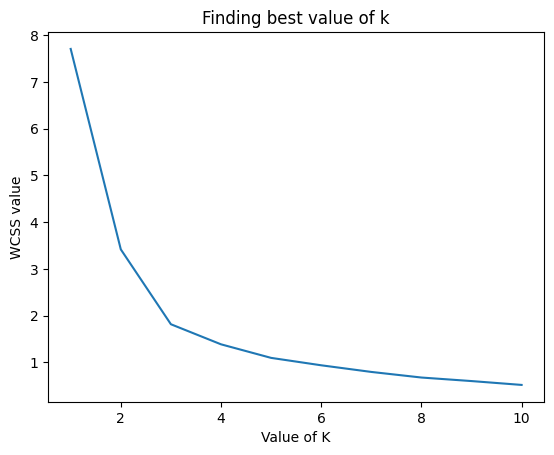

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title("Finding best value of k")
plt.xlabel("Value of K")
plt.ylabel("WCSS value")
plt.show()

In [ ]:

x = data_new.iloc[:,:].values
model = KMeans(n_clusters = 3)
y_pred = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


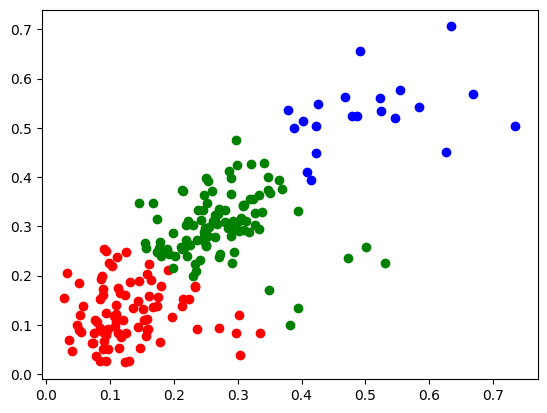

In [ ]:
plt.scatter(x[y_pred == 0,0],x[y_pred == 0,1],color = 'red')
plt.scatter(x[y_pred == 1,0],x[y_pred == 1,1],color = 'blue')
plt.scatter(x[y_pred == 2,0],x[y_pred == 2,1],color = 'green')